In [976]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [977]:
data=pd. read_csv('resultados partidos.csv',sep=';')

In [978]:
data.head()

,Temporada,Jornada,VS,Goles a Favor,Goles en contra,En casa,Visitante
0,2006,1,Nueva sevilla B,4.0,1.0,0.0,1.0
1,2006,2,Necropolis,6.0,2.0,1.0,0.0
2,2006,3,U.D.E. Abre,2.0,2.0,0.0,1.0
3,2006,4,Mures,5.0,2.0,1.0,0.0
4,2006,5,Espartina Tilde,3.0,1.0,0.0,1.0


In [979]:
data=data.dropna()

In [980]:
data.isnull().sum()

Temporada          0
Jornada            0
VS                 0
Goles a Favor      0
Goles en contra    0
En casa            0
Visitante          0
dtype: int64

In [981]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 570
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temporada        566 non-null    int64  
 1   Jornada          566 non-null    int64  
 2   VS               566 non-null    object 
 3   Goles a Favor    566 non-null    float64
 4   Goles en contra  566 non-null    float64
 5   En casa          566 non-null    float64
 6   Visitante        566 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 35.4+ KB


# Análisis de datos

In [982]:
goles=data[['Goles a Favor','Goles en contra']]

In [983]:
goles.sum()

Goles a Favor      930.0
Goles en contra    877.0
dtype: float64

In [984]:
goles.describe()

,Goles a Favor,Goles en contra
count,566.000000,566.000000
mean,1.643110,1.549470
std,1.569571,1.374943
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,13.000000,8.000000


In [985]:
diferencia_goles=data['Goles a Favor']-data['Goles en contra']

diferencia_goles.sum()

53.0

A lo largo de las 20 temporadas, el mayor numero de goles a favor en un partido ha sido 13 goles.
El mayor numero de goles en contra en un partido ha sido 8 goles.

El equipo marca una media de 1.64 goles por partido, y recibe 1.54. Por lo tanto marca mas que recibe aunque con un margen pequeño
la diferencia de goles ha sido de 53 goles

In [986]:
import plotly.express as px

In [987]:

fig=px.bar(data_frame=goles.sum(),color=('A favor','En contra'))

fig.update_xaxes(title='')
fig.update_yaxes(title='Número de goles')

In [988]:
goles_a_favor_en_casa=data[data['En casa']==1.0]['Goles a Favor'].sum()
goles_en_contra_en_casa=data[data['En casa']==1.0]['Goles en contra'].sum()

In [989]:
goles_en_casa=[goles_a_favor_en_casa,goles_en_contra_en_casa]
etiquetas=['Goles a favor en casa','Goles en contra en casa']

In [990]:
goles_en_casa

[540.0, 362.0]

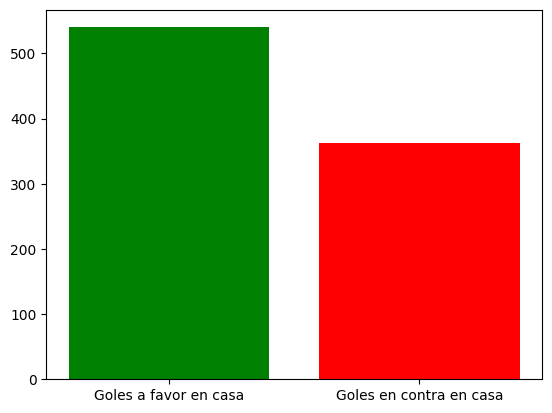

In [991]:
plt.bar(etiquetas,goles_en_casa,color=('green','red'))
plt.show()

In [992]:
goles_a_favor_fuera=data[data['Visitante']==1.0]['Goles a Favor'].sum()
goles_en_contra_fuera=data[data['Visitante']==1.0]['Goles en contra'].sum()
goles_fuera=[goles_a_favor_fuera,goles_en_contra_fuera]
etiquetas_fuera=['goles_a_favor_fuera','goles_en_contra_fuera']

<BarContainer object of 2 artists>

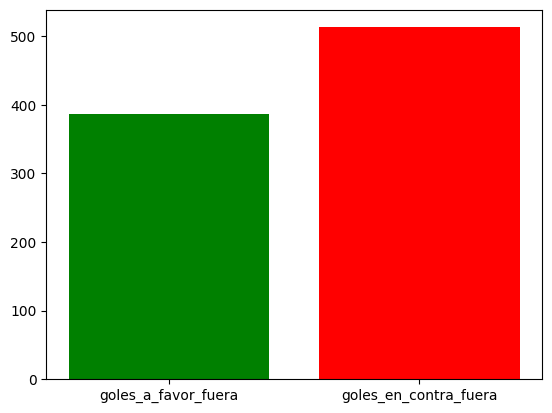

In [993]:
plt.bar(etiquetas_fuera,goles_fuera,color=('green','red'))

In [994]:
print(f'el numero de goles en casa fueron {goles_a_favor_en_casa} a favor y {goles_en_contra_en_casa} en contra ')
print(f'el numero de goles fuera se establece en {goles_a_favor_fuera} a favor y {goles_en_contra_fuera} en contra ')

el numero de goles en casa fueron 540.0 a favor y 362.0 en contra 
el numero de goles fuera se establece en 386.0 a favor y 513.0 en contra 


In [995]:
media_goles_en_contra_visitante=data[data['Visitante']==1.0]['Goles en contra'].mean()
media_goles_en_contra_local=data[data['En casa']==1.0]['Goles en contra'].mean()
print(f'La media de goles en contra como local es {round(media_goles_en_contra_local,2)} y {round(media_goles_en_contra_visitante,2)} como visitante ')

La media de goles en contra como local es 1.26 y 1.85 como visitante 


In [996]:
partidos_ganados=data[data['Goles a Favor']>data['Goles en contra']].shape[0]
partidos_perdidos=data[data['Goles a Favor']<data['Goles en contra']].shape[0]
partidos_empatados=data[data['Goles a Favor']==data['Goles en contra']].shape[0]

In [997]:
print(f'El numero de partidos ganados es {partidos_ganados}')
print(f'el numero de partidos empatados es {partidos_empatados}')
print(f'el numero de partidos perdidos es {partidos_perdidos}')

El numero de partidos ganados es 218
el numero de partidos empatados es 118
el numero de partidos perdidos es 230


<BarContainer object of 3 artists>

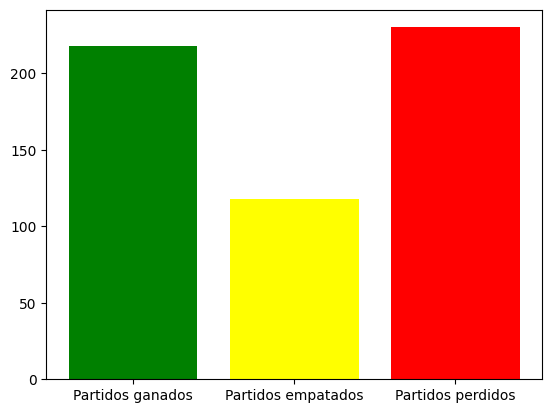

In [998]:
vic_emp_derr=[partidos_ganados,partidos_empatados,partidos_perdidos]
etiquetas_vic_derr=['Partidos ganados','Partidos empatados','Partidos perdidos']
plt.bar(etiquetas_vic_derr,vic_emp_derr,color=('green','yellow','red'))

In [999]:
puntos_conseguidos=(partidos_ganados) *3 + partidos_empatados
puntos_perdidos=partidos_perdidos*3
diferencia_puntos=puntos_conseguidos - puntos_perdidos
print(f'El numero de puntos conseguidos es {puntos_conseguidos}, ha perdido {puntos_perdidos}. La diferencia de puntos es {diferencia_puntos}' )

El numero de puntos conseguidos es 772, ha perdido 690. La diferencia de puntos es 82


In [1000]:
partidos_ganados_casa=data[(data['Goles a Favor']>data['Goles en contra']) & (data['En casa']==1.0)].shape[0]
partidos_ganados_fuera=data[(data['Goles a Favor']>data['Goles en contra']) & (data['Visitante']==1.0)].shape[0]
print(f'A lo largo de estos 20 años ha ganado {partidos_ganados_casa} partidos en casa y {partidos_ganados_fuera} fuera')

A lo largo de estos 20 años ha ganado 144 partidos en casa y 73 fuera


In [1001]:
partidos_perdidos_casa=data[(data['Goles a Favor']<data['Goles en contra']) & (data['En casa']==1.0)].shape[0]
partidos_perdidos_fuera=data[(data['Goles a Favor']<data['Goles en contra']) & (data['Visitante']==1.0)].shape[0]
print(f'A lo largo de estos 20 años ha perdido {partidos_perdidos_casa} partidos en casa y {partidos_perdidos_fuera} fuera')

A lo largo de estos 20 años ha perdido 85 partidos en casa y 145 fuera


In [1002]:
porcentaje_victorias_casa=(partidos_ganados_casa*100)/partidos_ganados

porcentaje_victorias_fuera=(partidos_ganados_fuera*100)/partidos_ganados
print(f'El porcentaje de victorias en casa es del {round(porcentaje_victorias_casa,2)}%')
print(f'El porcentaje de victorias a domicilio es del {round(porcentaje_victorias_fuera,2)}%')


El porcentaje de victorias en casa es del 66.06%
El porcentaje de victorias a domicilio es del 33.49%


In [1003]:
porcentaje_victorias=[porcentaje_victorias_casa,porcentaje_victorias_fuera]
etiquetas_tarta1=['porcentaje victorias local','porcentaje victorias visitante']
px.pie(values=porcentaje_victorias,names=etiquetas_tarta1,title='Porcentaje de victorias')

In [1004]:
porcentaje_derrotas_casa=(partidos_perdidos_casa*100)/partidos_perdidos

porcentaje_derrotas_fuera=(partidos_perdidos_fuera*100)/partidos_perdidos
print(f'El porcentaje de derrotas en casa es del {round(porcentaje_derrotas_casa,2)}%')
print(f'El porcentaje de derrotas a domicilio es del {round(porcentaje_derrotas_fuera,2)}%')

El porcentaje de derrotas en casa es del 36.96%
El porcentaje de derrotas a domicilio es del 63.04%


In [1005]:
porcentaje_derrotas=[porcentaje_derrotas_casa,porcentaje_derrotas_fuera]
etiquetas_tarta2=['porcentaje_derrotas_casa','porcentaje_derrotas_fuera']
px.pie(data,values=porcentaje_derrotas,names=etiquetas_tarta2,title='Porcentaje_derrotas')


In [1006]:
resultados_mas_repetidos=data[['Goles a Favor','Goles en contra']].value_counts().head()

In [1007]:
resultados_mas_repetidos=pd.DataFrame(resultados_mas_repetidos)
resultados_mas_repetidos=resultados_mas_repetidos.reset_index()

resultados_mas_repetidos

,Goles a Favor,Goles en contra,count
0,0.0,1.0,54
1,1.0,1.0,50
2,1.0,2.0,39
3,0.0,0.0,33
4,2.0,1.0,31


# Predicciones

In [1008]:
x=data[['Jornada','VS','En casa','Visitante']]
y=data[['Goles en contra']]

In [1009]:
x=pd.get_dummies(x,columns=['VS'])

In [1010]:
x

,Jornada,En casa,Visitante,VS_A.D Mosqueo,VS_A.D San Jose,VS_A.D. Carmona,VS_Albaida,VS_Alcala Rio,VS_Alcolea,VS_Almensilla,...,VS_U.D Rinconada,VS_U.D Solea,VS_U.D Tomares,VS_U.D Trajano,VS_U.D.E. Abre,VS_Umbrete,VS_Valencina,VS_Villafranco,VS_Villafranco B,VS_Villaverde
0,1,0.0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,0.0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,4,1.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0.0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,30,1.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,31,0.0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,32,1.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569,33,0.0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1011]:
from sklearn.model_selection import train_test_split


In [1012]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [1013]:
import tensorflow as tf

In [1014]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(units=128,input_shape=(108,), dtype='float32'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(units=64, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(units=32, activation='relu'),
tf.keras.layers.Dense(units=1)])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [1015]:
model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [1016]:
print('modelo entrenando')
historial=model.fit(x_train,y_train,epochs=100,verbose=False)
print('modelo entrenado')

modelo entrenando
modelo entrenado


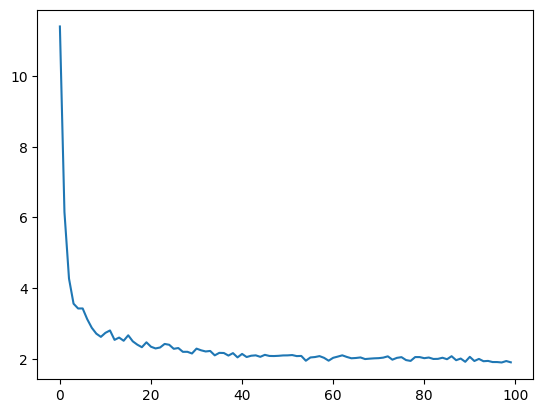

In [1017]:
plt.plot(historial.history['loss'],label='perdida')

In [1018]:
y_hat=model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [1019]:
accuracy,loss=model.evaluate(x_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 1.4069 - mean_absolute_error: 0.9759
